## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [23]:
from scipy.stats import shapiro
import statsmodels.api as sm

In [4]:
df_flights = pd.read_csv('Data/flights_table.csv')

In [6]:
df_passengers = pd.read_csv('Data/passengers_table.csv')
df_fuel = pd. read_csv('Data/fuel_table.csv')

In [5]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [7]:
df_flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  316
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 1636
dep_delay                1669
taxi_out                 1719
wheels_off               1718
wheels_on                1766
taxi_in                  1767
crs_arr_time                0
arr_time                 1732
arr_delay                1960
cancelled                   0
cancellation_code       98299
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      1943
air_time                 1977
flights                     0
distance                    0
carrier_de

In [19]:
df_flights['arr_delay'].value_counts()

-9.0      2921
-11.0     2917
-8.0      2854
-13.0     2834
-12.0     2798
          ... 
 333.0       1
 567.0       1
 830.0       1
 456.0       1
 703.0       1
Name: arr_delay, Length: 607, dtype: int64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [12]:
## Drop rows with missing arr_delay 
df_flights.dropna(subset=['arr_delay'], inplace=True)

Text(0.5, 0, 'Arrival delay')

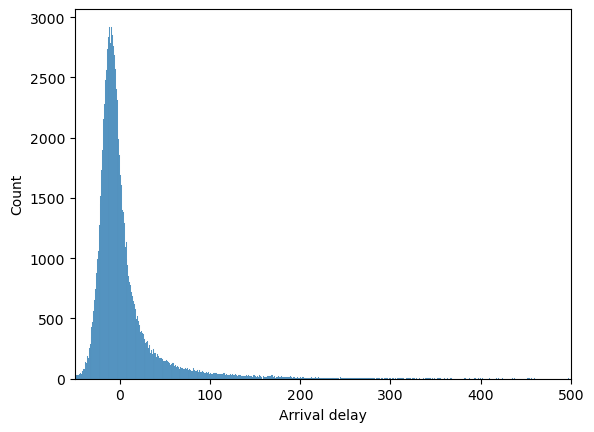

In [22]:
## Plot a graph
ax = sns.histplot(x=df_flights['arr_delay'])

ax.set_xlim(-50,500)

ax.set_xlabel("Arrival delay")

In [25]:
## Shapiro Wilk test
stat, p_value = shapiro(df_flights['arr_delay'])
p_value

0.0

Not normally distributed but that is without removing outliers

In [28]:
## Remove outliers --> 	Using IQR Method
Q1 = df_flights['arr_delay'].quantile(0.25)
Q3 = df_flights['arr_delay'].quantile(0.75)
IQR = Q3 - Q1
iqr = df_flights['arr_delay'].quantile(0.75) - df_flights['arr_delay'].quantile(0.25)

In [33]:
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

In [36]:
df_arr_delay = df_flights[(df_flights['arr_delay'] > lower_bound) & (df_flights['arr_delay'] < upper_bound)]

In [40]:
## This dataframe now has arrival delay with outliers removed
df_arr_delay = df_arr_delay['arr_delay']

Text(0.5, 0, 'Arrival delay')

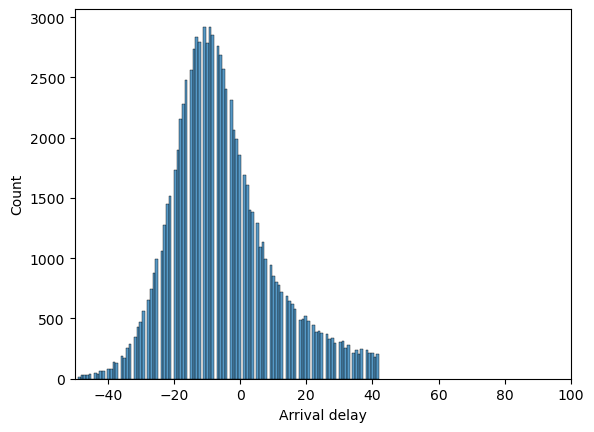

In [43]:
## Plot a graph
ax = sns.histplot(x=df_arr_delay)

ax.set_xlim(-50,100)

ax.set_xlabel("Arrival delay")


In [ ]:
## Shapiro Wilk test
stat, p_value = shapiro(df_arr_delay)
p_value

Still Not Normally distributed

In [46]:
## If we take a random sample?
arr_delay_sample = df_arr_delay.sample( n= 10000 )
stat, p_value = shapiro(arr_delay_sample)
p_value

7.006492321624085e-45

In this case it is normally distributed

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [47]:
df_flights2 = df_flights[(df_flights['arr_delay'] > lower_bound) & (df_flights['arr_delay'] < upper_bound)]

In [64]:
df_monthly_delay = df_flights[['fl_date','arr_delay']]

In [ ]:
## Convert fl_date to date time object so we can extract the Month
df_monthly_delay['fl_date'] = pd.to_datetime(df_monthly_delay['fl_date'])

In [ ]:
## Create new month column
df_monthly_delay['month'] = df_monthly_delay['fl_date'].dt.month

In [ ]:
df_monthly_delay.drop(columns = 'fl_date', inplace = True)

In [68]:
df_monthly_delay

,arr_delay,month
1,7.0,4
2,-4.0,12
3,-33.0,11
4,-13.0,5
5,-15.0,11
...,...,...
99995,-13.0,8
99996,47.0,8
99997,-20.0,4
99998,-11.0,9


In [72]:
df_monthly_delay.groupby('month', as_index = False).agg(['mean','median'])

arr_delay       
            mean median
month                  
1       3.270001   -7.0
2       5.988638   -6.0
3       2.613784   -6.0
4       4.087005   -6.0
5       6.473603   -6.0
6      10.882803   -4.0
7       9.474350   -5.0
8       8.485595   -5.0
9       2.696210   -8.0
10      3.074547   -6.0
11      2.767923   -7.0
12      5.135483   -6.0

In [73]:
df_mean_delay = df_monthly_delay.groupby('month', as_index = False).mean()

In [76]:
df_mean_delay

,month,arr_delay
0,1,3.270001
1,2,5.988638
2,3,2.613784
3,4,4.087005
4,5,6.473603
5,6,10.882803
6,7,9.474350
7,8,8.485595
8,9,2.696210
9,10,3.074547


Text(0.5, 1.0, 'Avg Departure Delay per Month')

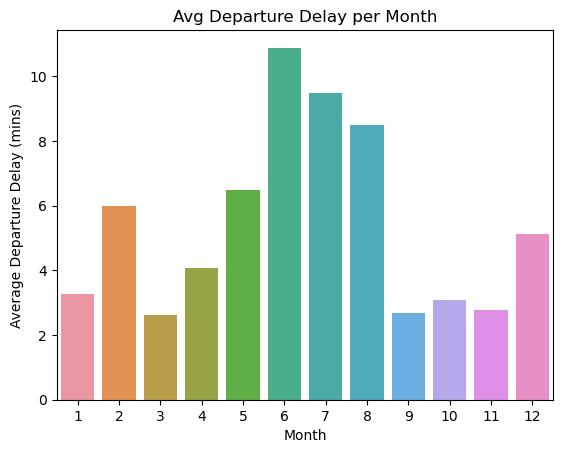

In [79]:
ax = sns.barplot(data=df_mean_delay, x='month', y='arr_delay')
 
##Labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Average Departure Delay (mins)')
ax.set_title('Avg Departure Delay per Month')

According to the mean, June, July and August had the highest delays.These are the summer months so we have the most amount of air travel in general, perhaps resulting in more delays

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [86]:
num_arr_delays = df_flights[df_flights['arr_delay'] > 0]['arr_delay'].count()
num_dep_delays = df_flights[df_flights['dep_delay'] > 0]['dep_delay'].count()
print(num_arr_delays)
print(num_dep_delays)

34277
33511


In [87]:
before_departure_percent = num_dep_delays / num_arr_delays * 100
print(before_departure_percent)

97.76526533827348


#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [95]:
df_flights_speed = df_flights
df_flights_speed['flight_speed'] = df_flights['distance'] / df_flights['air_time']

In [96]:
df_dep_delay = df_flights_speed[df_flights['dep_delay'] > 0]
df_dep_delay.shape

(33511, 43)

In [97]:
df_no_dep_delay = df_flights_speed[(df_flights['dep_delay'] == 0) | (df_flights['dep_delay'] < 0)]
df_no_dep_delay.shape

(64499, 43)

In [98]:
avg_speed_delay = df_dep_delay['flight_speed'].mean()
avg_speed_nodelay = df_no_dep_delay['flight_speed'].mean()
print(avg_speed_delay)
print(avg_speed_nodelay)

6.764529382920201
6.5961945571962595


In [100]:
## Perform t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df_dep_delay['flight_speed'].dropna(), df_no_dep_delay['flight_speed'].dropna())

print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: 20.13693113004389, p-value: 5.335268698305114e-90


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

For this task let's take this under consideration:
1. Long Haul: 3000 miles or more
2. Medium Haul: 1500 miles or more but less than 3000 miles
3. Short Haul: less than 1500 miles

In [494]:
# load csv file
df_takeoff = pd.read_csv('Data/flightsV2.csv')

Creating a separate time group

In [508]:
# convert crs_dep_time to time in hours and seconds
df_takeoff['time_col'] = pd.to_datetime(df_takeoff['crs_dep_time'].astype(str).apply(lambda x: x.zfill(4)), format='%H%M').dt.time

In [509]:
# convert the time_col column to a number of seconds past midnight
df_takeoff['time_seconds'] = df_takeoff['time_col'].apply(lambda x: (x.hour * 3600) + (x.minute * 60) + x.second)

# bin the time_seconds column
df_takeoff['time_group'] = pd.cut(df_takeoff['time_seconds'], 
                                       bins=[0, 14400, 57600, 72000, 86399], 
                                       labels=['Morning', 'Afternoon', 'Evening', 'Night'])

In [510]:
# new column for long, medium and short haul
df_takeoff['flight_type'] = np.where(df_takeoff['distance'] > 3000, 'long', np.where((df_takeoff['distance'] > 1500) & (df_takeoff['distance'] < 3000), 'medium', 'short'))

Text(0, 0.5, 'Flight Type')

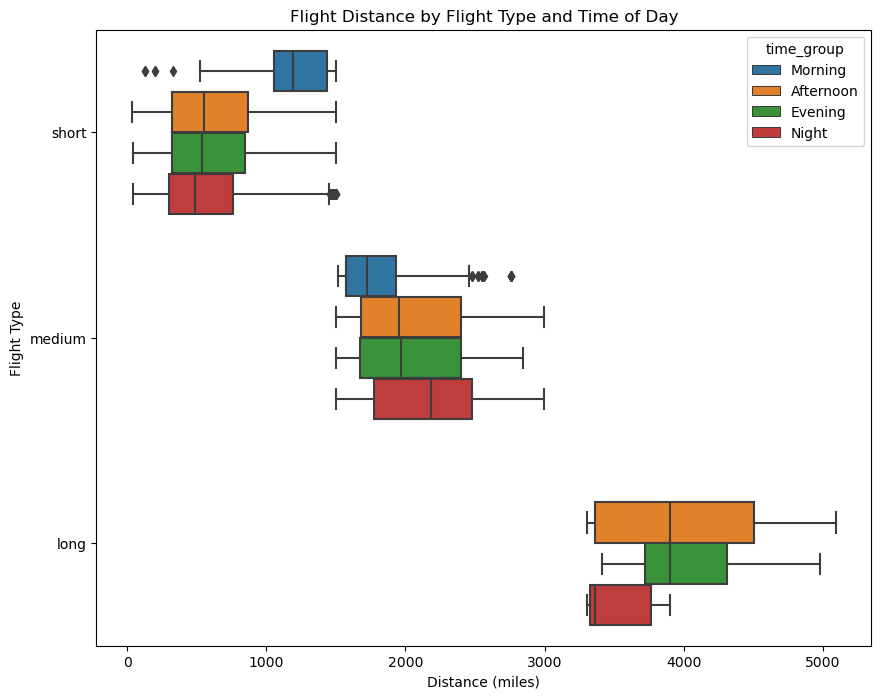

In [511]:
# box plot for flight_type and time_group
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='distance', y='flight_type', hue='time_group', data=df_takeoff)
ax.set_title('Flight Distance by Flight Type and Time of Day')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Flight Type')

In [512]:
# count flights by flight_type and time_group
df_takeoff_count = df_takeoff.groupby(['time_group']).size().reset_index(name='count')
df_takeoff_count

,time_group,count
0,Morning,339
1,Afternoon,65771
2,Evening,23130
3,Night,10760


Text(0, 0.5, 'Flight Type')

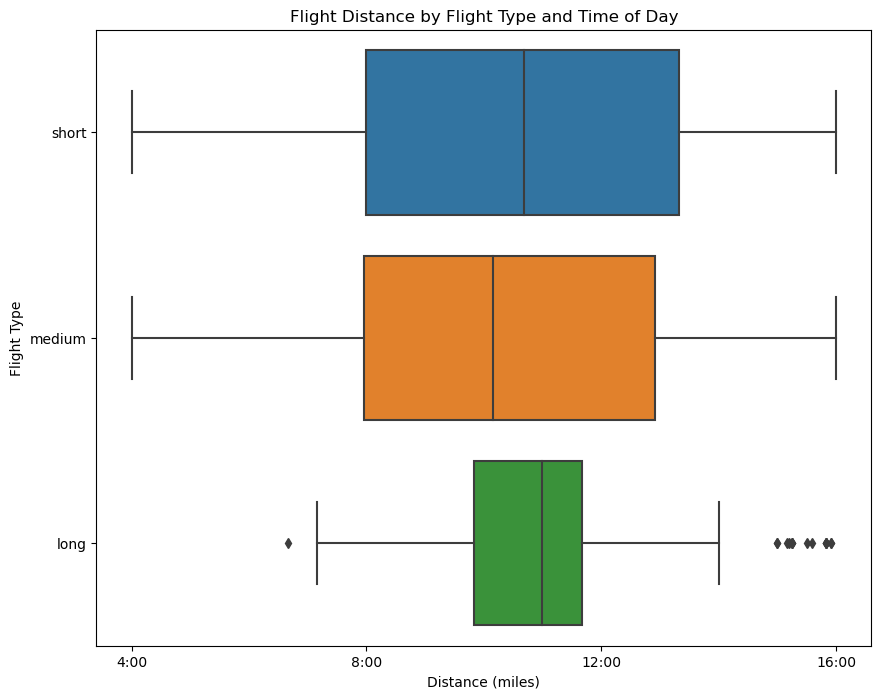

In [517]:
# count number of values between 14400, 57600 using time_seconds column
df_takeoff['time_seconds'].between(14400, 57600).sum()

# create a box plot for flight_type and time_seconds between 14400 and 57600 (convert to hours)
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='time_seconds', y='flight_type', data=df_takeoff[df_takeoff['time_seconds'].between(14400, 57600)])
# convert x-axis to hours
ax.set_xticks([14400, 28800, 43200, 57600])
ax.set_xticklabels(['4:00', '8:00', '12:00', '16:00'])
ax.set_title('Flight Distance by Flight Type and Time of Day')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Flight Type')


Clearly we can interpret most number of flights take off between `10.00 AM to 11.00 AM`

**From above information we can interpret that the most number of flights are in the `afternoon` and the least number of flights are in the `morning`.**

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

First going to check number of flights

In [101]:
df_traffic = df_flights[['origin', 'dest']]

In [115]:
## Create dataframe with count of flights from an airport
df_origin = df_flights.groupby('origin').size().reset_index(name='num_flights_from')
df_origin = df_origin.rename(columns = {'origin':'airport'})

In [116]:
## Create dataframe with count of flights to airport
df_dest = df_flights.groupby('dest').size().reset_index(name='num_flights_to')
df_dest = df_dest.rename(columns = {'dest':'airport'})

In [117]:
## Merge dataframes
df_traffic = pd.merge(df_origin,df_dest, on = 'airport')

In [119]:
df_traffic.head()

,airport,num_flights_from,num_flights_to
0,ABE,77,61
1,ABI,24,19
2,ABQ,361,341
3,ABR,16,3
4,ABY,13,9


In [124]:
## Create new column with combined flights
df_traffic['total flights'] = df_traffic['num_flights_from'] + df_traffic['num_flights_to']

## Sort by top 10 based on flights
busiest_airports = df_traffic.sort_values(by = 'total flights', ascending = False)

busiest_airports.head(10)

,airport,num_flights_from,num_flights_to,total flights
21,ATL,4866,4922,9788
252,ORD,4874,4849,9723
93,DFW,3612,3563,7175
92,DEN,3349,3322,6671
192,LAX,3212,3046,6258
72,CLT,3092,3029,6121
313,SEA,2399,2316,4715
166,IAH,2198,2210,4408
100,DTW,2216,2190,4406
315,SFO,2214,2160,4374


Now lets check by number of passengers

In [125]:
df_passengers.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [142]:
df_passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,28,28,1393280,5570,4956,388,0,2615,8672,7981,...,US,United States,6,622,1,2017,2,6,F,DU
1,31,31,3199100,8432,7343,129977,0,3831,13813,12588,...,ES,Spain,6,627,1,2019,7,8,F,IU
2,28,27,832363,3402,3029,578,1200,2350,8401,7813,...,EC,Ecuador,6,612,1,2018,8,5,F,IU
3,10,10,327852,1582,1106,0,1862,1824,2902,2582,...,US,United States,6,614,1,2015,2,4,F,DU
4,0,3,640170,0,0,558358,0,264,236,160,...,US,United States,6,625,2,2016,12,1,P,DU


In [132]:
p_origin = df_passengers.groupby('origin')['passengers'].sum().reset_index(name='num_passengers_origin')
p_origin = p_origin.rename(columns = {'origin':'airport'})

In [137]:
p_dest = df_passengers.groupby('dest')['passengers'].sum().reset_index(name='num_passengers_dest')
p_dest = p_dest.rename(columns = {'dest':'airport'})

In [139]:
p_traffic = pd.merge(p_origin, p_dest, on = 'airport')

In [141]:
p_traffic['total_passengers'] = p_traffic['num_passengers_origin'] + p_traffic['num_passengers_dest']

In [144]:
passengers_busiest = p_traffic.sort_values(by = 'total_passengers', ascending = False)
passengers_busiest.head(10)

,airport,num_passengers_origin,num_passengers_dest,total_passengers
68,ATL,5561091,5313811,10874902
554,LAX,4345371,4486314,8831685
722,ORD,4054542,4165764,8220306
246,DFW,3638167,3318694,6956861
479,JFK,3281376,3204178,6485554
245,DEN,3086259,3294860,6381119
882,SFO,2910419,2868174,5778593
552,LAS,2523521,2816337,5339858
306,EWR,2339589,2587475,4927064
447,IAH,2309150,2288013,4597163


For the most part, number of flights does correspond to total number of passengers at a specific airport

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?